# <center> **`  HOUSE PRICE PREDICTION  `** <center /> 

###  **`1. Importing Imp Libraries`**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

In [2]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

###  **`2. Data Preparation`**

In [3]:
data = pd.DataFrame(housing.data , columns=housing.feature_names)
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


###  **`3. Exploratory Data Analysis (EDA)`**

In [4]:
data['AveRooms'] = data['AveRooms'].astype(int)

In [5]:
data['AveBedrms'] = data['AveBedrms'].astype(int)

In [6]:
data['AveOccup'] = np.ceil(data['AveOccup'])

In [7]:
# Assuming `data` is the DataFrame containing your data
min_age = data['AveOccup'].min()  # Minimum house age
max_age = data['AveOccup'].max()  # Maximum house age

# Display the range of house age
print(f"Range: {min_age} - {max_age}")

Range: 1.0 - 1244.0


In [8]:
# Assuming `data` is the DataFrame containing your data
min_age = data['AveRooms'].min()  # Minimum house age
max_age = data['AveRooms'].max()  # Maximum house age

# Display the range of house age
print(f"Range: {min_age} - {max_age}")

Range: 0 - 141


In [9]:
outliers = data[data['AveRooms'] > 10].count()  # Adjust threshold as needed
print(outliers)

MedInc        177
HouseAge      177
AveRooms      177
AveBedrms     177
Population    177
AveOccup      177
Latitude      177
Longitude     177
dtype: int64


In [10]:
data['AveRooms'] = data['AveRooms'].clip(upper=10)
data = data[data['AveRooms'] <= 10]

In [11]:
# Assuming `data` is the DataFrame containing your data
min_age = data['AveOccup'].min()  # Minimum house age
max_age = data['AveOccup'].max()  # Maximum house age

# Display the range of house age
print(f"Range: {min_age} - {max_age}")

Range: 1.0 - 1244.0


In [12]:
outliers = data[data['AveBedrms'] > 4].count()  # Adjust threshold as needed
print(outliers)

MedInc        45
HouseAge      45
AveRooms      45
AveBedrms     45
Population    45
AveOccup      45
Latitude      45
Longitude     45
dtype: int64


In [13]:
data['AveBedrms'] = data['AveBedrms'].clip(upper=4)
data = data[data['AveBedrms'] <= 4]

In [14]:
outliers = data[data['AveOccup'] > 6].count()  # Adjust threshold as needed
print(outliers)

MedInc        114
HouseAge      114
AveRooms      114
AveBedrms     114
Population    114
AveOccup      114
Latitude      114
Longitude     114
dtype: int64


In [15]:
print(data['AveOccup'].describe())


count    20640.000000
mean         3.562016
std         10.391397
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max       1244.000000
Name: AveOccup, dtype: float64


In [16]:
data['AveOccup'] = data['AveOccup'].clip(upper=6)

In [17]:
data = data[data['AveOccup'] <= 6]


In [18]:
outliers2 = data[data['AveOccup'] > 6].count()  # Adjust threshold as needed
print(outliers2)

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64


In [19]:
# Assuming `data` is the DataFrame containing your data
min_age = data['Population'].min()  # Minimum house age
max_age = data['Population'].max()  # Maximum house age

# Display the range of house age
print(f"Range: {min_age} - {max_age}")

Range: 3.0 - 35682.0


In [20]:
outliers1 = data[data['Population'] > 4000].count()
outliers1

MedInc        586
HouseAge      586
AveRooms      586
AveBedrms     586
Population    586
AveOccup      586
Latitude      586
Longitude     586
dtype: int64

In [21]:
data['Population'] = data['Population'].clip(upper=4000)
data = data[data['Population'] <= 4000]

In [22]:
data['Price'] = housing.target
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6,1,322.0,3.0,37.88,-122.23,4.526
1,8.3014,21.0,6,0,2401.0,3.0,37.86,-122.22,3.585
2,7.2574,52.0,8,1,496.0,3.0,37.85,-122.24,3.521
3,5.6431,52.0,5,1,558.0,3.0,37.85,-122.25,3.413
4,3.8462,52.0,6,1,565.0,3.0,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5,1,845.0,3.0,39.48,-121.09,0.781
20636,2.5568,18.0,6,1,356.0,4.0,39.49,-121.21,0.771
20637,1.7000,17.0,5,1,1007.0,3.0,39.43,-121.22,0.923
20638,1.8672,18.0,5,1,741.0,3.0,39.43,-121.32,0.847


##### `Checking Null Values`

In [23]:
data.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [24]:
data.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.603417,-0.134676,-0.008405,-0.066988,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.226908,-0.096192,-0.312846,0.000335,0.011173,-0.108197,0.105623
AveRooms,0.603417,-0.226908,1.000000,0.198942,-0.095666,-0.048490,0.126467,-0.058434,0.285187
AveBedrms,-0.134676,-0.096192,0.198942,1.000000,0.087866,-0.076117,0.046004,0.013275,-0.047626
Population,-0.008405,-0.312846,-0.095666,0.087866,1.000000,0.201176,-0.127872,0.113748,-0.030946
AveOccup,-0.066988,0.000335,-0.048490,-0.076117,0.201176,1.000000,-0.157403,0.163550,-0.261330
Latitude,-0.079809,0.011173,0.126467,0.046004,-0.127872,-0.157403,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.058434,0.013275,0.113748,0.163550,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.285187,-0.047626,-0.030946,-0.261330,-0.144160,-0.045967,1.000000


##### The following have high Correlation with each other :
AveBedrms &  AveRooms : 0.847621

Latitude &  Longitude : -0.924664

Shown using the graphs below as Well

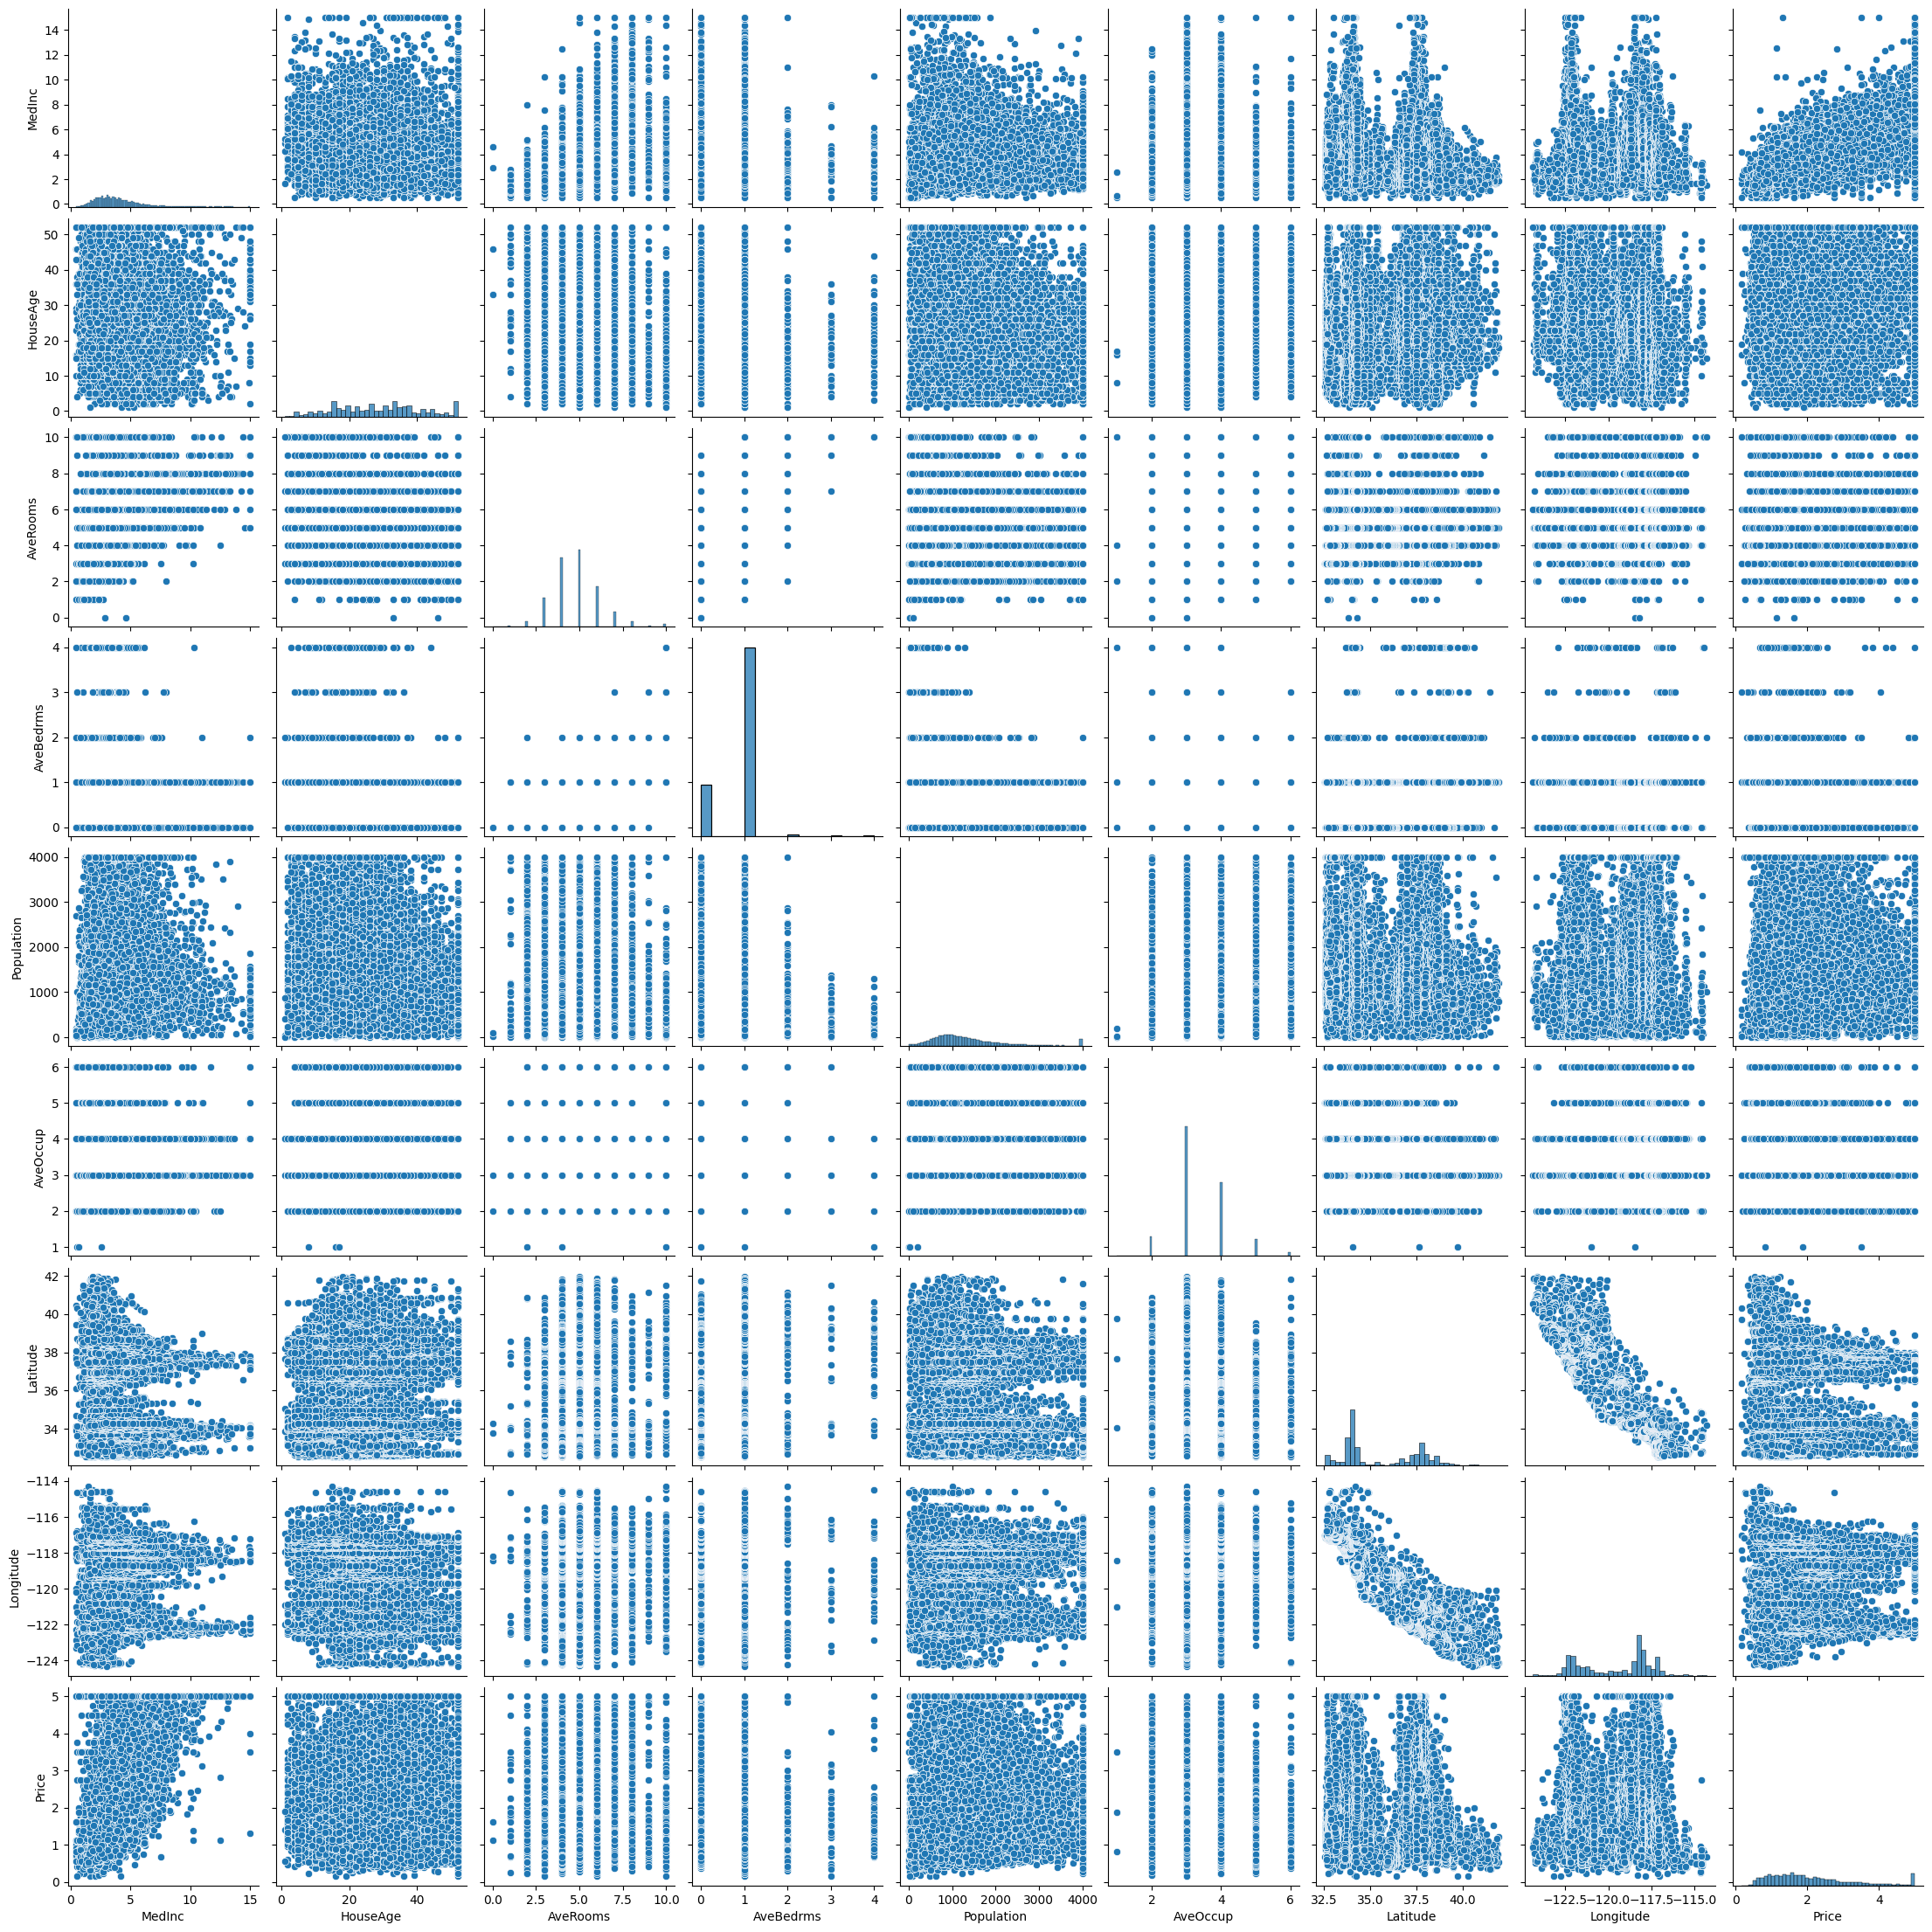

In [25]:
sns.pairplot(data)

In [26]:
# data.drop(columns=['AveBedrms','Longitude'], inplace=True)

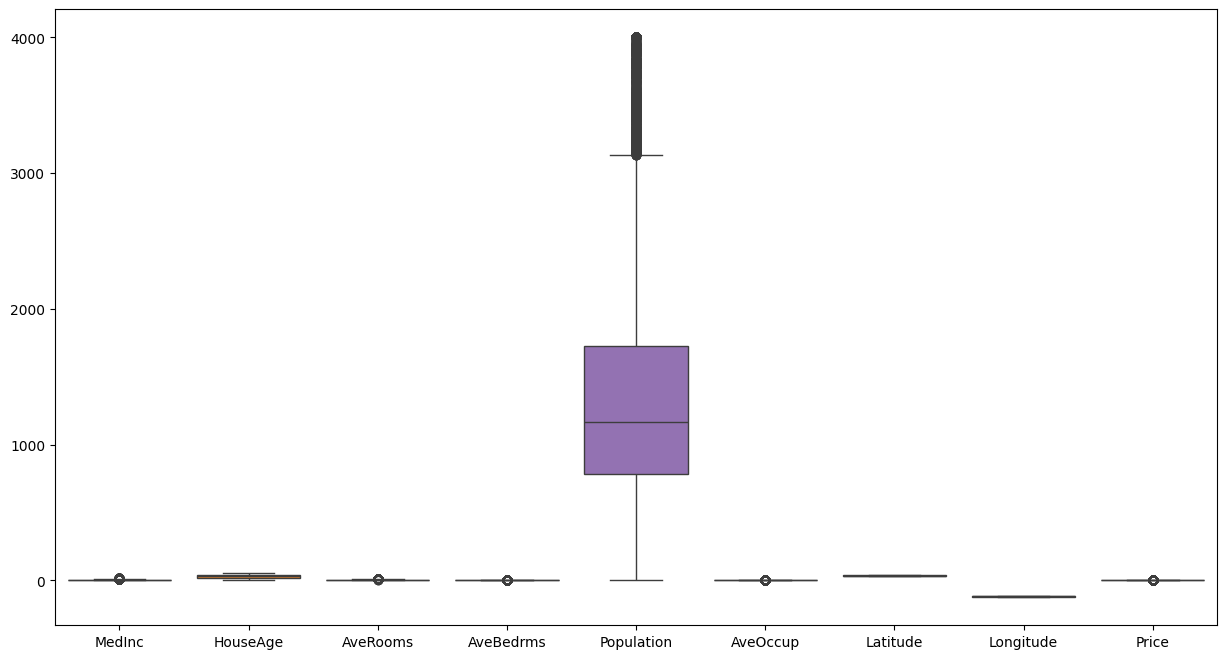

In [27]:
fig, ax = plt.subplots(figsize = (15,8))
sns.boxplot(data= data , ax = ax)
plt.savefig('BoxPlot.jpg')

#### **Here We Observe, Population is having extremely high Outliers which in turn is resulting in biasness in data**

##### **To Deal with this, I've used Standard Scalar Normalization Technique**

### **Split the data into independent and dependent features**

In [28]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [29]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6,1,322.0,3.0,37.88,-122.23
1,8.3014,21.0,6,0,2401.0,3.0,37.86,-122.22
2,7.2574,52.0,8,1,496.0,3.0,37.85,-122.24
3,5.6431,52.0,5,1,558.0,3.0,37.85,-122.25
4,3.8462,52.0,6,1,565.0,3.0,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5,1,845.0,3.0,39.48,-121.09
20636,2.5568,18.0,6,1,356.0,4.0,39.49,-121.21
20637,1.7000,17.0,5,1,1007.0,3.0,39.43,-121.22
20638,1.8672,18.0,5,1,741.0,3.0,39.43,-121.32


In [30]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: Price, Length: 20640, dtype: float64

#### **`Split the data into training data and testing data`**

In [31]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.3, random_state = 42)

In [32]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
7061,4.1312,35.0,5,0,1218.0,3.0,33.93,-118.02
14689,2.8631,20.0,4,1,999.0,3.0,32.79,-117.09
17323,4.2026,24.0,5,0,731.0,3.0,34.59,-120.14
10056,3.1094,14.0,5,1,302.0,3.0,39.26,-121.00
15750,3.3068,52.0,4,1,1526.0,3.0,37.77,-122.45
...,...,...,...,...,...,...,...,...
11284,6.3700,35.0,6,0,658.0,4.0,33.78,-117.96
11964,3.0500,33.0,6,1,1753.0,4.0,34.02,-117.43
5390,2.9344,36.0,3,1,1756.0,4.0,34.03,-118.38
860,5.7192,15.0,6,1,1777.0,4.0,37.58,-121.96


In [33]:
X_test

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
20046,1.6812,25.0,4,1,1392.0,4.0,36.06,-119.01
3024,2.5313,30.0,5,1,1565.0,3.0,35.14,-119.46
15663,3.4801,52.0,3,1,1310.0,2.0,37.80,-122.44
20484,5.7376,17.0,6,1,1705.0,4.0,34.28,-118.72
9814,3.7250,34.0,5,1,1063.0,3.0,36.62,-121.93
...,...,...,...,...,...,...,...,...
17505,2.9545,47.0,4,1,581.0,3.0,37.36,-121.90
13512,1.4891,41.0,4,1,994.0,4.0,34.11,-117.32
10842,3.5120,16.0,3,1,4000.0,3.0,33.67,-117.91
16559,3.6500,10.0,5,1,4000.0,4.0,37.82,-121.28


In [34]:
y_train

7061     1.93800
14689    1.69700
17323    2.59800
10056    1.36100
15750    5.00001
          ...   
11284    2.29200
11964    0.97800
5390     2.22100
860      2.83500
15795    3.25000
Name: Price, Length: 14448, dtype: float64

In [35]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
17505    2.37500
13512    0.67300
10842    2.18400
16559    1.19400
5786     2.09800
Name: Price, Length: 6192, dtype: float64

### **Normalization of given data points**

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [37]:
X_train_norm = scaler.fit_transform(X_train)
X_train_norm

array([[ 0.13350629,  0.50935748,  0.11420459, ..., -0.50614022,
        -0.80568191,  0.78093406],
       [-0.53221805, -0.67987313, -0.61492839, ..., -0.50614022,
        -1.33947268,  1.24526986],
       [ 0.1709897 , -0.36274497,  0.11420459, ..., -0.50614022,
        -0.49664515, -0.27755183],
       ...,
       [-0.49478713,  0.58863952, -1.34406138, ...,  0.74496567,
        -0.75885816,  0.60119118],
       [ 0.96717102, -1.07628333,  0.84333758, ...,  0.74496567,
         0.90338501, -1.18625198],
       [-0.68320166,  1.85715216, -1.34406138, ..., -0.50614022,
         0.99235014, -1.41592345]])

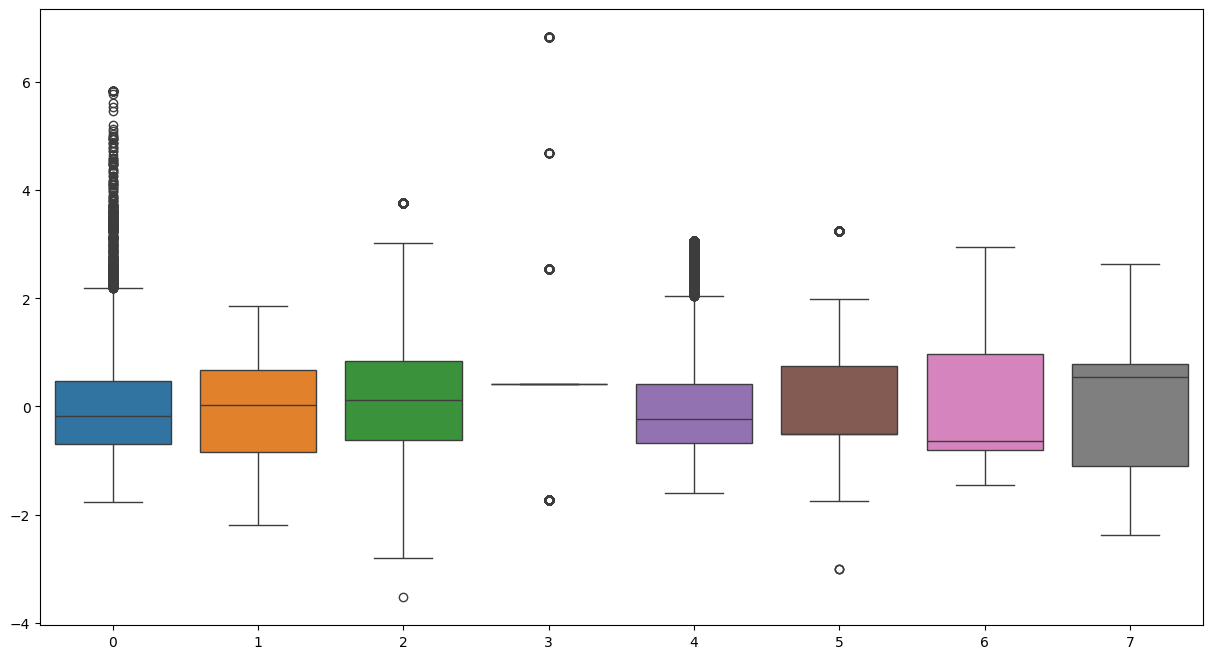

In [38]:
fig, ax = plt.subplots(figsize = (15,8))
sns.boxplot(data= X_train_norm , ax = ax)
plt.savefig('BoxPlot_Trained_Data.jpg')

In [39]:
X_test_norm = scaler.transform(X_test)
X_test_norm

array([[-1.1526893 , -0.28346293, -0.61492839, ...,  0.74496567,
         0.19166399,  0.28664112],
       [-0.70640568,  0.11294728,  0.11420459, ..., -0.50614022,
        -0.23911452,  0.06196251],
       [-0.20830675,  1.85715216, -1.34406138, ..., -1.75724611,
         1.00639726, -1.42590916],
       ...,
       [-0.19155996, -0.99700129, -1.34406138, ..., -0.50614022,
        -0.92742367,  0.8358555 ],
       [-0.11911302, -1.47269353,  0.11420459, ...,  0.74496567,
         1.01576201, -0.84673764],
       [-0.43304974, -0.91771925, -1.34406138, ..., -0.50614022,
        -0.70266966,  0.67109119]])

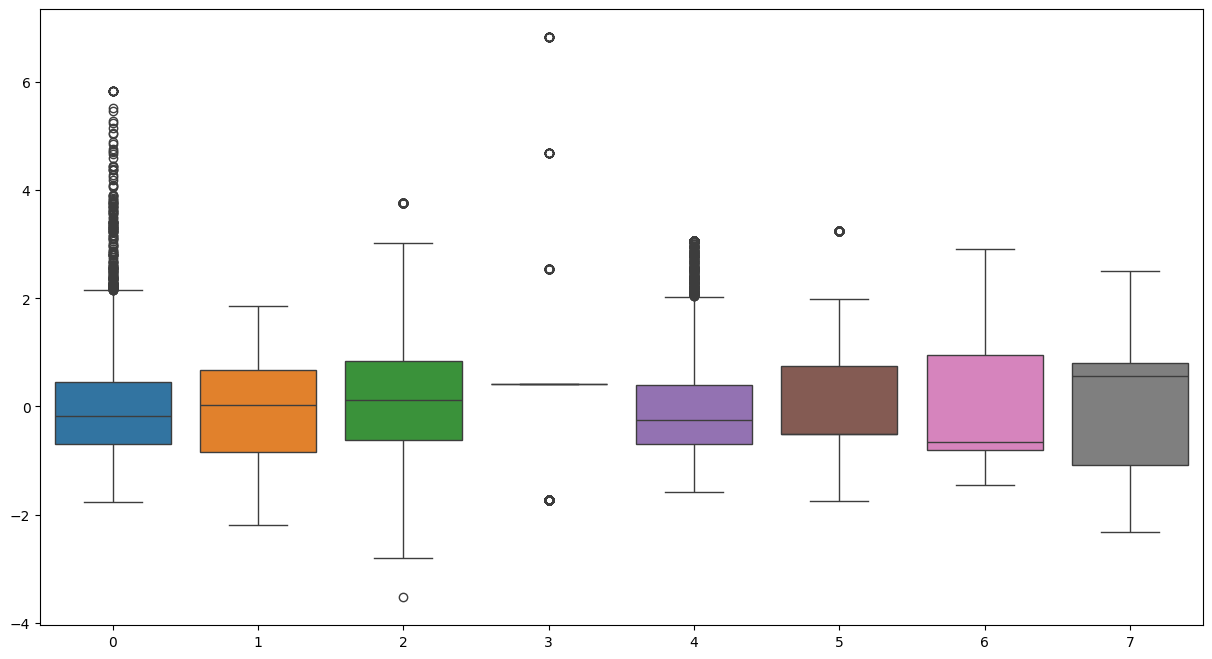

In [40]:
fig, ax = plt.subplots(figsize = (15,8))
sns.boxplot(data= X_test_norm , ax = ax)
plt.savefig('BoxPlot_Test_Data.jpg')

###  **`4. Model Training`**

In [41]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train_norm, y_train)

LinearRegression()

####  **`Model Name : regression`**

In [42]:
regression.coef_

array([ 0.75984417,  0.13585298, -0.06018271,  0.10514825,  0.02989362,
       -0.26402091, -0.92817881, -0.85187911])

In [43]:
regression.intercept_

np.float64(2.0692396089424165)

###  **`5. Model Prediction`**

In [44]:
reg_pred = regression.predict(X_test_norm)
reg_pred

array([0.61662757, 1.89328015, 3.02935288, ..., 2.28576512, 1.48785095,
       2.04478859])

####  **`Calculating Error / Residual`**

In [45]:
residuals = y_test - reg_pred
residuals

20046   -0.139628
3024    -1.435280
15663    1.970657
20484   -0.535947
9814    -0.022418
           ...   
17505    0.047171
13512   -0.154162
10842   -0.101765
16559   -0.293851
5786     0.053211
Name: Price, Length: 6192, dtype: float64

####  **`Distribution Plot of Residuals`**

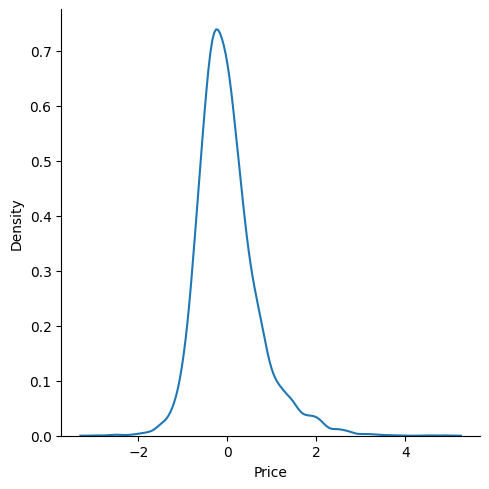

In [46]:
sns.displot(residuals, kind='kde')

###  **`6. Model Evaluation / Performance`**

In [47]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print(f'Mean Square Error (MSE) : {mean_squared_error(y_test, reg_pred)*100} %')
print(f'Mean Absolute Error (MAE) : {mean_absolute_error(y_test, reg_pred)*100} %')
print(f'r2_score : {r2_score(y_test, reg_pred)*100} %')


Mean Square Error (MSE) : 46.25084057391635 %
Mean Absolute Error (MAE) : 50.155122025462894 %
r2_score : 64.76234112879744 %


In [48]:
score = r2_score(y_test, reg_pred)
score

0.6476234112879744

#### **`Adjusted R Square`**

In [49]:
print(f'Ajusted R-Square : {1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test_norm.shape[1]-1)}')

Ajusted R-Square : 0.6471674816891233


In [50]:
# Assuming 'y_test' is the true target variable and 'reg_pred' is the predicted values
mse = mean_squared_error(y_test, reg_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Mean Squared Error (MSE): 0.46
Root Mean Squared Error (RMSE): 0.68


In [51]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
7061,4.1312,35.0,5,0,1218.0,3.0,33.93,-118.02
14689,2.8631,20.0,4,1,999.0,3.0,32.79,-117.09
17323,4.2026,24.0,5,0,731.0,3.0,34.59,-120.14
10056,3.1094,14.0,5,1,302.0,3.0,39.26,-121.00
15750,3.3068,52.0,4,1,1526.0,3.0,37.77,-122.45
...,...,...,...,...,...,...,...,...
11284,6.3700,35.0,6,0,658.0,4.0,33.78,-117.96
11964,3.0500,33.0,6,1,1753.0,4.0,34.02,-117.43
5390,2.9344,36.0,3,1,1756.0,4.0,34.03,-118.38
860,5.7192,15.0,6,1,1777.0,4.0,37.58,-121.96


In [52]:
y_train

7061     1.93800
14689    1.69700
17323    2.59800
10056    1.36100
15750    5.00001
          ...   
11284    2.29200
11964    0.97800
5390     2.22100
860      2.83500
15795    3.25000
Name: Price, Length: 14448, dtype: float64

In [53]:
scaler.fit(X_train)
input_user_data = [5.7192,	15.0,	6,	1	,1777.0	,3.178891,	37.58,	-121.96]
input_user_data = np.array(input_user_data)
lst = input_user_data.reshape(1, -1)
pred_inp = scaler.transform(lst)
pred_inp

C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 0.96717102, -1.07628333,  0.84333758,  0.40837828,  0.46744394,
        -0.28232864,  0.90338501, -1.18625198]])

In [54]:
prediction = regression.predict(pred_inp)
prediction

array([2.91066321])

###  **`7. Saving the Model`**

In [55]:
import pickle
pickle.dump(regression , open('Model.pkl', 'wb'))

###  **`8. Dashboarding using Streamlit`**

In [56]:
streamlit_code = """

"""

with open("app.py", "a") as file:
    file.write(streamlit_code)


In [57]:
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6,1,322.0,3.0,37.88,-122.23,4.526
1,8.3014,21.0,6,0,2401.0,3.0,37.86,-122.22,3.585
2,7.2574,52.0,8,1,496.0,3.0,37.85,-122.24,3.521
3,5.6431,52.0,5,1,558.0,3.0,37.85,-122.25,3.413
4,3.8462,52.0,6,1,565.0,3.0,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5,1,845.0,3.0,39.48,-121.09,0.781
20636,2.5568,18.0,6,1,356.0,4.0,39.49,-121.21,0.771
20637,1.7000,17.0,5,1,1007.0,3.0,39.43,-121.22,0.923
20638,1.8672,18.0,5,1,741.0,3.0,39.43,-121.32,0.847
